# MinMaxScaler for Unsupervised and Supervised Models

#### Using MinMaxScaler to scale the data before using unsupervised and supervised learning on the data to see if it provides a better model. 
<br>

#### Use 3+ supervised machine learning models covered in this class (remember the no free lunch theorem). Use SciKit Learn for this. You may use Tensorflow/Keras for neural networks models.
<br>

#### Use 3+ unsupervised machine learning models covered in this class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,117.870,127.349,95.654,0.00647,0.000050,0.00356,0.00300,0.01067,0.03087,0.276,...,0.02402,0.04977,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256
1,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
2,237.323,243.709,229.256,0.00303,0.000010,0.00173,0.00159,0.00519,0.01242,0.116,...,0.00882,0.02089,0.00533,24.679,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
3,116.342,581.289,94.246,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
4,124.445,135.069,117.495,0.00431,0.000030,0.00141,0.00167,0.00422,0.02184,0.197,...,0.01685,0.03724,0.00479,25.135,0.553134,0.775933,-6.650471,0.254498,1.840198,0.103561
5,202.544,241.350,164.168,0.00254,0.000010,0.00100,0.00133,0.00301,0.02662,0.228,...,0.02006,0.04426,0.01049,20.680,0.497480,0.630409,-6.132663,0.220617,2.576563,0.159777
6,122.964,130.049,114.676,0.00428,0.000030,0.00124,0.00155,0.00373,0.01681,0.154,...,0.01400,0.02789,0.00462,24.971,0.538688,0.754073,-6.482096,0.264967,2.054419,0.128872
7,116.879,131.897,108.153,0.00788,0.000070,0.00334,0.00493,0.01003,0.02645,0.265,...,0.02137,0.04183,0.00786,22.603,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
8,193.030,208.900,80.297,0.00766,0.000040,0.00450,0.00389,0.01351,0.03044,0.275,...,0.02084,0.05312,0.00947,21.934,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668
9,125.791,140.557,96.206,0.01378,0.000110,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,15.433,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375


,status
0,1
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,1
9,1


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,156.405,189.398,142.822,0.00768,0.000050,0.00372,0.00399,0.01116,0.03995,0.348,...,0.04310,0.05164,0.03365,17.153,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
1,184.055,196.537,166.977,0.00258,0.000010,0.00134,0.00147,0.00403,0.01463,0.132,...,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730
2,242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,0.134,...,0.01014,0.02542,0.00476,25.032,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706
3,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,0.181,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
4,178.285,442.824,82.063,0.00462,0.000030,0.00157,0.00194,0.00472,0.01279,0.129,...,0.01151,0.01851,0.00856,25.020,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,198.764,396.961,74.904,0.00740,0.000040,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
172,186.695,211.961,149.442,0.01872,0.000100,0.01075,0.01154,0.03225,0.05830,0.784,...,0.06259,0.08096,0.10952,12.529,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487
173,106.516,112.777,93.105,0.00589,0.000060,0.00291,0.00319,0.00873,0.04932,0.441,...,0.03651,0.08050,0.03031,17.060,0.637814,0.744064,-5.301321,0.320385,2.375138,0.243080
174,96.106,108.664,84.510,0.00694,0.000070,0.00389,0.00415,0.01168,0.04024,0.364,...,0.02876,0.06799,0.01823,19.055,0.544805,0.770466,-4.441519,0.155097,2.645959,0.327978


,status
0,1
1,1
2,0
3,0
4,1
...,...
171,0
172,1
173,1
174,1


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,214.289,260.277,77.973,0.00567,0.000030,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
1,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
2,116.342,581.289,94.246,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
3,197.569,217.627,90.794,0.00803,0.000040,0.00490,0.00448,0.01470,0.02177,0.189,...,0.01439,0.03836,0.01337,19.269,0.372222,0.725216,-5.736781,0.164529,2.882450,0.202879
4,163.656,200.841,76.779,0.00742,0.000050,0.00380,0.00390,0.01140,0.01659,0.164,...,0.01497,0.02214,0.01778,23.831,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961
5,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
6,116.388,129.038,108.970,0.00346,0.000030,0.00169,0.00213,0.00507,0.01725,0.155,...,0.01331,0.02623,0.00415,26.143,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
7,222.236,231.345,205.495,0.00266,0.000010,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
8,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
9,176.170,185.604,163.564,0.00369,0.000020,0.00205,0.00218,0.00616,0.01851,0.168,...,0.01491,0.02814,0.00340,24.951,0.341435,0.783626,-6.006414,0.196371,2.536527,0.173218


,status
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,1


array([[0.41476463, 0.17810915, 0.44442394, ..., 0.75166078, 0.637666  ,
        0.57488795],
       [0.58323686, 0.19268196, 0.58371007, ..., 0.12862575, 0.41739328,
        0.14744588],
       [0.94148865, 0.31209161, 0.93507669, ..., 0.21567965, 0.41929197,
        0.12047147],
       ...,
       [0.11078953, 0.02170305, 0.15773844, ..., 0.70710843, 0.42344613,
        0.4112044 ],
       [0.04736111, 0.0133072 , 0.10817668, ..., 0.33502169, 0.54392518,
        0.58703928],
       [0.59608096, 0.19510497, 0.64487372, ..., 0.43856971, 0.42297235,
        0.17814833]])

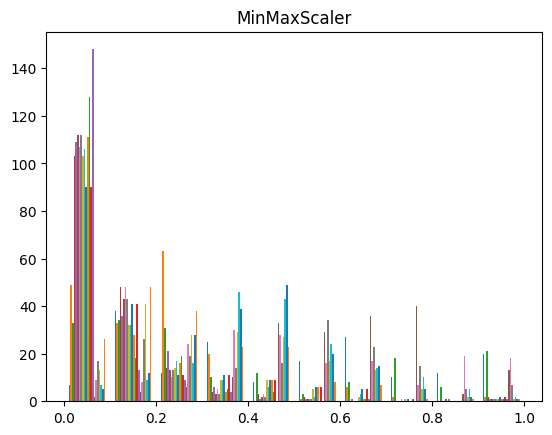

In [3]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_mm = minmax_scaler.fit_transform(train_X)
X_val_mm = minmax_scaler.transform(val_X)
X_test_mm = minmax_scaler.transform(test_X)
display(X_train_mm)

plt.hist(X_train_mm)
plt.title('MinMaxScaler')
plt.show()

In [4]:
#use the isolation forest model to search for anomalies on the scaled/transformed data
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

# Fit the model to the MinMaxScaler data
clf.fit(X_train_mm)

# create a column for the predictions of the MinMaxScaler data
df['anomaly_score'] = clf.decision_function(X_train_mm)
df['outlier'] = clf.predict(X_train_mm)
mm_anomaly_test = clf.decision_function(X_test_mm)
mm_anomalies_test = mm_anomaly_test < anomaly_threshold
mm_anomaly_val = clf.decision_function(X_val_mm)
mm_anomalies_val = mm_anomaly_val < anomaly_threshold
mm_train_out = df.loc[df['outlier'] == -1].index

# show the number of outliers for the MinMaxScaler data
print('MinMaxScaler')
print(df['outlier'].value_counts())
print(mm_anomalies_test)
print(mm_anomalies_val)
display(df.loc[df['outlier'] == -1])

MinMaxScaler
outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
49,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961,1,-0.084057,-1
79,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.102646,-1


In [5]:
# Remove the outliers for each type of scaled/transformed data
X_train_no_outliers_mm = np.delete(X_train_mm, mm_train_out, axis=0)
y_train_no_outliers_mm = np.delete(train_y, mm_train_out)

display(X_train_no_outliers_mm)
display(y_train_no_outliers_mm)

array([[0.41476463, 0.17810915, 0.44442394, ..., 0.75166078, 0.637666  ,
        0.57488795],
       [0.58323686, 0.19268196, 0.58371007, ..., 0.12862575, 0.41739328,
        0.14744588],
       [0.94148865, 0.31209161, 0.93507669, ..., 0.21567965, 0.41929197,
        0.12047147],
       ...,
       [0.11078953, 0.02170305, 0.15773844, ..., 0.70710843, 0.42344613,
        0.4112044 ],
       [0.04736111, 0.0133072 , 0.10817668, ..., 0.33502169, 0.54392518,
        0.58703928],
       [0.59608096, 0.19510497, 0.64487372, ..., 0.43856971, 0.42297235,
        0.17814833]])

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

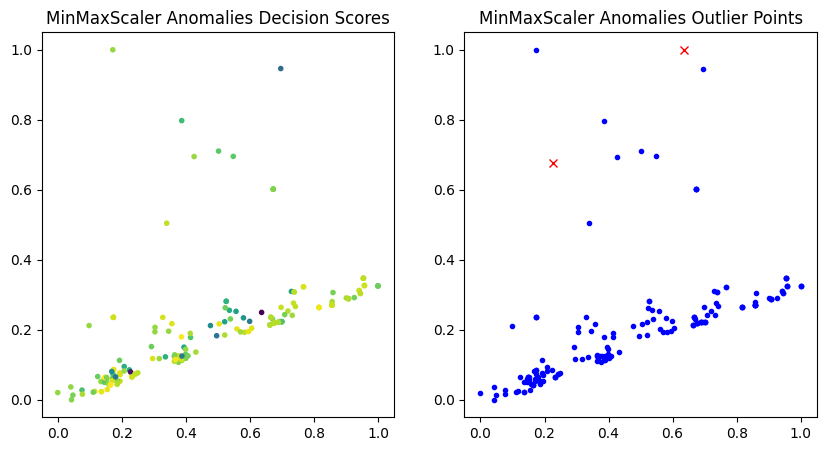

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.170869,-1.0,-0.084057
1,1.0,0.236341,-1.0,-0.102646


In [6]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

clf.fit(X_train_mm)
predictions_mm = clf.predict(X_train_mm)

ax1.scatter(X_train_mm[:, 0], X_train_mm[:, 1], c=clf.decision_function(X_train_mm), marker='.')
ax1.set_title('MinMaxScaler Anomalies Decision Scores')
ax2.plot(X_train_mm[predictions_mm==1][:,0], X_train_mm[predictions_mm==1][:,1], 'b.')
ax2.plot(X_train_mm[predictions_mm==-1][:,0], X_train_mm[predictions_mm==-1][:,-1], 'rx')
ax2.set_title('MinMaxScaler Anomalies Outlier Points')

plt.show()

df = pd.DataFrame(dict(predicted_label=clf.predict(X_train_mm), score=clf.decision_function(X_train_mm)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
mm_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(mm_scores)

## PCA for Dimensionality Reduction - MinMaxScaler

Component 1: Explained Variance 0.5023568872232376
Component 2: Explained Variance 0.6868573772570931
Component 3: Explained Variance 0.7898685553586258
Component 4: Explained Variance 0.847662773797401
Component 5: Explained Variance 0.8849208726007336
Component 6: Explained Variance 0.920801591968313
Component 7: Explained Variance 0.943995476943601
Component 8: Explained Variance 0.9605319956188016
Component 9: Explained Variance 0.9750905504395055
Component 10: Explained Variance 0.9858038299651519
Component 11: Explained Variance 0.9922712711241356
Component 12: Explained Variance 0.9956616937457854
Component 13: Explained Variance 0.9973468998752157
Component 14: Explained Variance 0.9984399400602401
Component 15: Explained Variance 0.9990172071115366
Component 16: Explained Variance 0.9994109659159115
Component 17: Explained Variance 0.9996731867896161
Component 18: Explained Variance 0.9998787385658224
Component 19: Explained Variance 0.9999737644879045
Component 20: Explained 

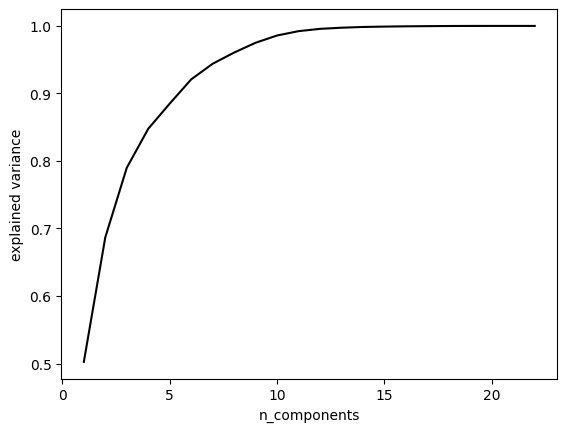

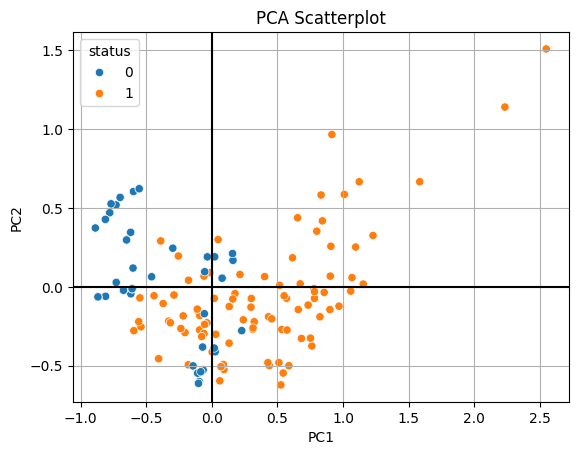

In [7]:
#use principal component analysis to determine catagories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_mm) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')
for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 2)

#fit the model and transform the data
transformed = pca.fit_transform(X_train_mm)

#create a dataframe of the transformed data
df_mm = pd.DataFrame(transformed, columns=['PC1', 'PC2'])
df_mm['status'] = train_y

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_mm)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

## PCA for Dimensionality Reduction - MinMaxScaler Outliers Removed

Component 1: Explained Variance 0.49056169646591713
Component 2: Explained Variance 0.6668452228461547
Component 3: Explained Variance 0.779733313055633
Component 4: Explained Variance 0.8458760682595061
Component 5: Explained Variance 0.8881085664269398
Component 6: Explained Variance 0.9168320507246662
Component 7: Explained Variance 0.9427334886149753
Component 8: Explained Variance 0.9602059063513038
Component 9: Explained Variance 0.9742556303711836
Component 10: Explained Variance 0.9860351857860911
Component 11: Explained Variance 0.9930122250853967
Component 12: Explained Variance 0.9956894121678919
Component 13: Explained Variance 0.99722157034162
Component 14: Explained Variance 0.998391896983337
Component 15: Explained Variance 0.9990089948681317
Component 16: Explained Variance 0.9994156081161103
Component 17: Explained Variance 0.9997092579302262
Component 18: Explained Variance 0.9998883858059233
Component 19: Explained Variance 0.9999717831375514
Component 20: Explained 

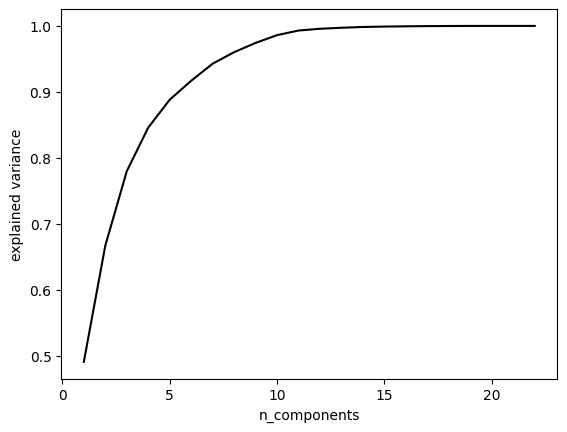

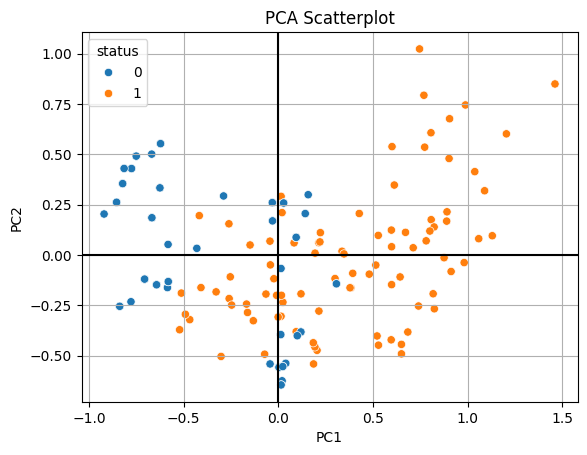

In [8]:
#use principal component analysis to determine catagories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers_mm) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')
for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 2)

#fit the model and transform the data
transformed = pca.fit_transform(X_train_no_outliers_mm)

#create a dataframe of the transformed data
df_mm_no = pd.DataFrame(transformed, columns=['PC1', 'PC2'])
df_mm_no['status'] = y_train_no_outliers_mm

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_mm_no)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

There was more variance explained in less components with the RobustScaler or PowerTransformer data. Those will be used for further analysis instead of MinMaxScaler.